In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 타이타닉 사망 생존 데이터
- 타이타닉 호 승객에 관련된 정보
- kaggle에서 제공되는 데이터
- train.csv 를 학습시켜 test.csv에 대한 사망 생존을 예측한다.

### 데이터를 읽어온다.

In [2]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


|  칼럼명| 의미 | 값종류 |
|-------| ---| ---|
|-PassengerId|승객번호|1부터 1씩 증가 시킨 값, 의미 없음
|Survived|생존여부|0:사망, 1:생존|
|Name|승객 이름|
|Sex|성별|Male 남성, Female-여성|
|Age|승객나이|
|SibSp|동승한 형제 자매 수|
|Parch|동승한 부모 자식 수|
|Ticker|티켓 번호|
|Fare|요금|
|Cabin|객실번호|
|Embarked|선착장|C-Cherbourg, Q-Queenstown, S-Southampton|

### 데이터 프레임 정보 확인

In [4]:
# 결측치 확인
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 데이터 전처리

In [6]:
# 처리의 용이성을 위해 두 데이터 프레임을 합친다.
data = pd.concat((train_df, test_df))
# 인덱스를 다시 초기화 해준다.
data.reset_index(drop=True, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# 전체 결측치 확인
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### PassengerId
- 승객 일련 번호
- 1부터 1씩 증가시킨 값으로 의미가 없다.
- 사용하지 않을 것이다.

### PClass
- 승객 등급
- 1 - 1등급, 2 - 2등급, 3 - 3등급


In [8]:
# 결측치 확인
data["Pclass"].isna().sum()

0

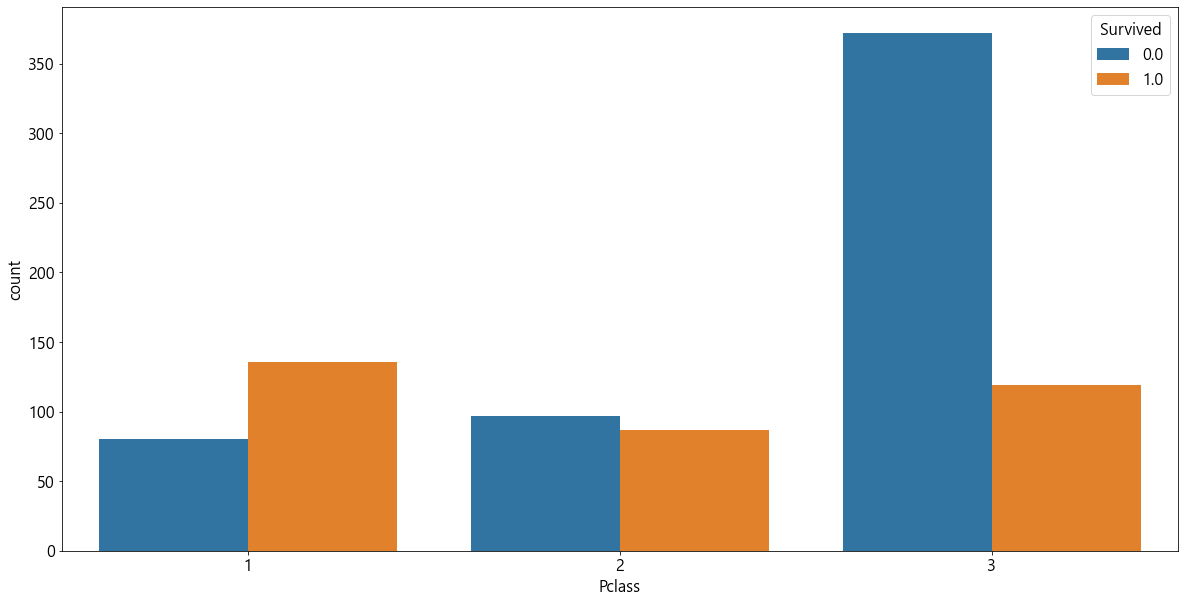

In [9]:
# 결측치를 제외하고 데이터가 같은 것 끼리 그룹으로 묶어 그 수를 구해 그래프로 그린다.
# x = 수를 계산할 칼럼
# hue = 결과 데이터 칼럼
# 전체적인 비율을 볼 때 사용
sns.countplot(data=data, x="Pclass", hue="Survived")
plt.show()

1등석은 생존률이 높고 3등석은 사망률이 높다.

### Name : 이름
이름과 사망과 관계없는건 알지만 분석하지 않고 분석가의 임의대로 판단하여 (증거없이) 결정하면 안된다.
물론 관련이 없지만 그래도 연습이니까 한번 한다.

In [10]:
data["Name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

split으로 컴마로 나누어서 하면 되겠네 뒷 부분이 First Name이니깐

In [11]:
# LastName 컬럼 추가
data["LastName"] = 0

# 정규식 : 문자열의 양식을 지정할 때 사용하는 문자식
# ([A-Za-z]+) : 앞에서부터 대소문자 영문에 해당하는 것까지만 해당 
data["LastName"] = data["Name"].str.extract("([A-Za-z]+)")
data["LastName"]

0          Braund
1         Cumings
2       Heikkinen
3        Futrelle
4           Allen
          ...    
1304      Spector
1305        Oliva
1306      Saether
1307         Ware
1308        Peter
Name: LastName, Length: 1309, dtype: object

는 split으로 나누는거 아니였구요..

In [12]:
# LastName의 정보를 파악한다.
data["LastName"].value_counts()

O            12
Andersson    11
Sage         11
Goodwin       8
Asplund       8
             ..
Isham         1
Pulbaum       1
Jansson       1
McCormack     1
Funk          1
Name: LastName, Length: 853, dtype: int64

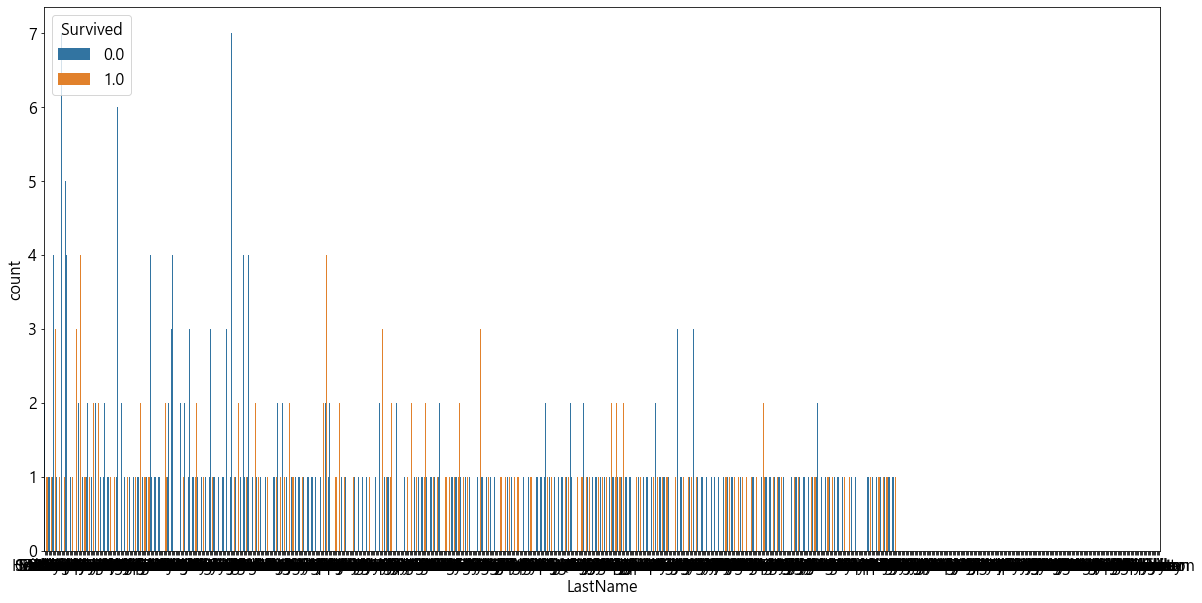

In [13]:
sns.countplot(data=data, x="LastName", hue="Survived")
plt.show()

일부 LastName에 대해 생존률과 사망률이 높은 것이 소수 존재한다.

### Sex
- 성별
- male : 남성, female: 여성

In [14]:
# 결측치 확인
data["Sex"].isna().sum()

0

In [15]:
# 값 종류 확인
data["Sex"].value_counts().index

Index(['male', 'female'], dtype='object')

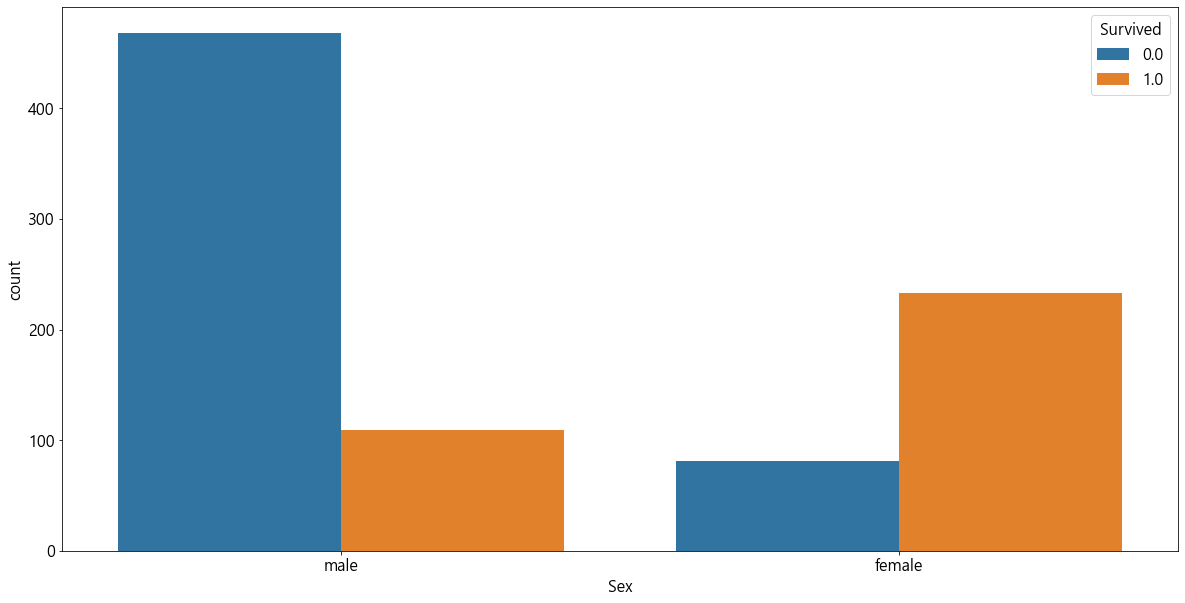

In [16]:
# 사망생존 비율 확인
sns.countplot(data=data, x="Sex", hue="Survived")
plt.show()

남성은 사망확률이 높고 여성은 생존확률이 높다.

### Age
- 나이

In [17]:
# 결측치 확인
data["Age"].isna().sum()

263

In [18]:
# 이름에서 이니셜을 추출한다.
data["Initial"] = 0

#([A-Za-z]+)\. : A-Za-z로 구서오디어 있고 마지막이 .으로 끝나는 것
data["Initial"] = data["Name"].str.extract('([A-Za-z]+)\.')
data["Initial"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Lady          1
Mme           1
Capt          1
Don           1
Countess      1
Jonkheer      1
Sir           1
Dona          1
Name: Initial, dtype: int64

In [20]:
# Initial을 기준으로 그룹을 묶고 나이의 평균을 구한다.
a1 = data.groupby("Initial")["Age"]

# 결측치인 부분에 데이터를 담는다.
data["Age"] = a1.apply(lambda x : x.fillna(x.mean()))
data["Age"]

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    32.252151
1305    39.000000
1306    38.500000
1307    32.252151
1308     5.482642
Name: Age, Length: 1309, dtype: float64

In [22]:
list(a1)

[('Capt',
  745    70.0
  Name: Age, dtype: float64),
 ('Col',
  647     56.0
  694     60.0
  1022    53.0
  1093    47.0
  Name: Age, dtype: float64),
 ('Countess',
  759    33.0
  Name: Age, dtype: float64),
 ('Don',
  30    40.0
  Name: Age, dtype: float64),
 ('Dona',
  1305    39.0
  Name: Age, dtype: float64),
 ('Dr',
  245     44.000000
  317     54.000000
  398     23.000000
  632     32.000000
  660     50.000000
  766     43.571429
  796     49.000000
  1184    53.000000
  Name: Age, dtype: float64),
 ('Jonkheer',
  822    38.0
  Name: Age, dtype: float64),
 ('Lady',
  556    48.0
  Name: Age, dtype: float64),
 ('Major',
  449    52.0
  536    45.0
  Name: Age, dtype: float64),
 ('Master',
  7        2.000000
  16       2.000000
  50       7.000000
  59      11.000000
  63       4.000000
            ...    
  1251    14.500000
  1270     5.000000
  1280     6.000000
  1283    13.000000
  1308     5.482642
  Name: Age, Length: 61, dtype: float64),
 ('Miss',
  2       26.000000

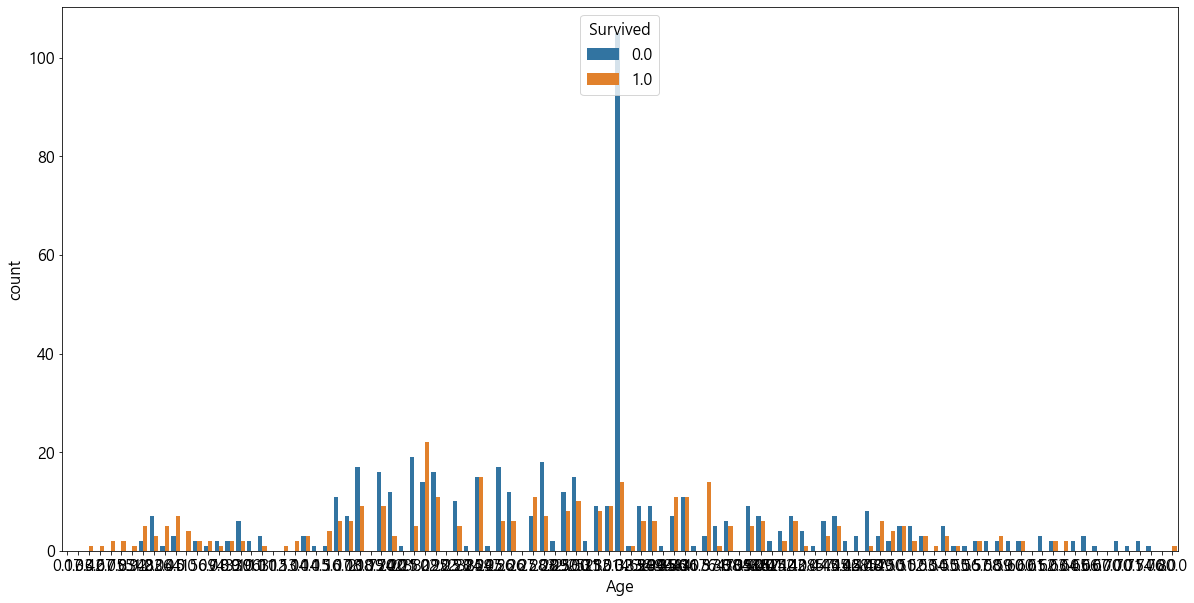

In [25]:
sns.countplot(data=data, x="Age", hue="Survived")
plt.show()

영유아는 생존률이 높다.

### SibSp : 동승한 형제, 자매 수

In [26]:
data["SibSp"].isna().sum()


0

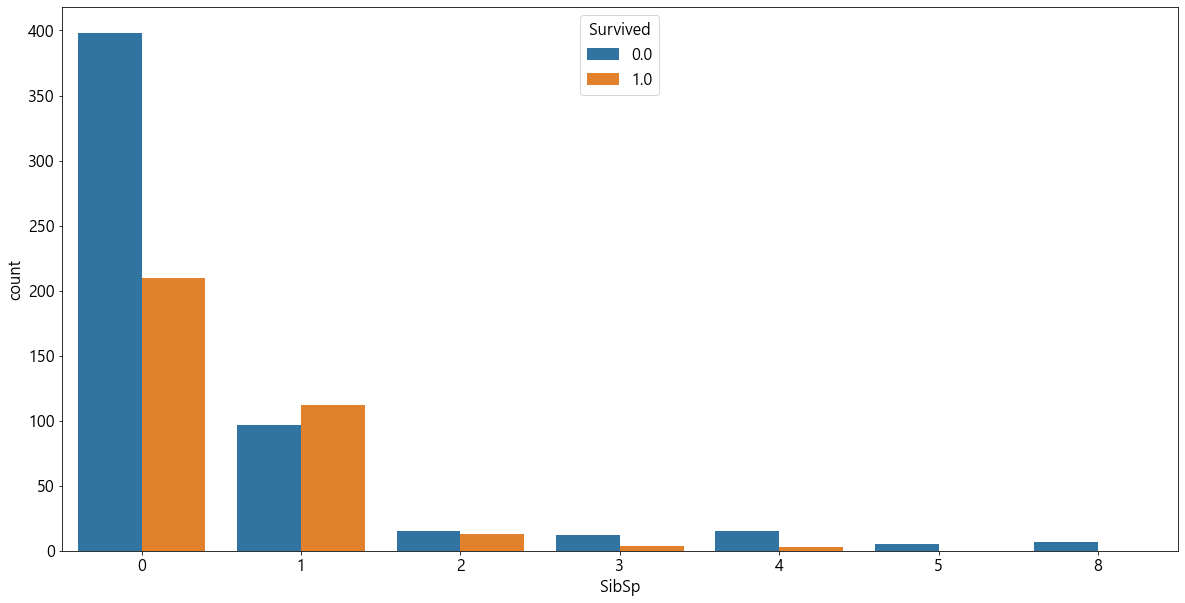

In [27]:
sns.countplot(data=data, x="SibSp", hue="Survived")
plt.show()

동승한 형제 자매수에 따라 생존률이 다르다.

### Parch : 동승한 부모 자식 수

In [28]:
data["Parch"].isna().sum()


0

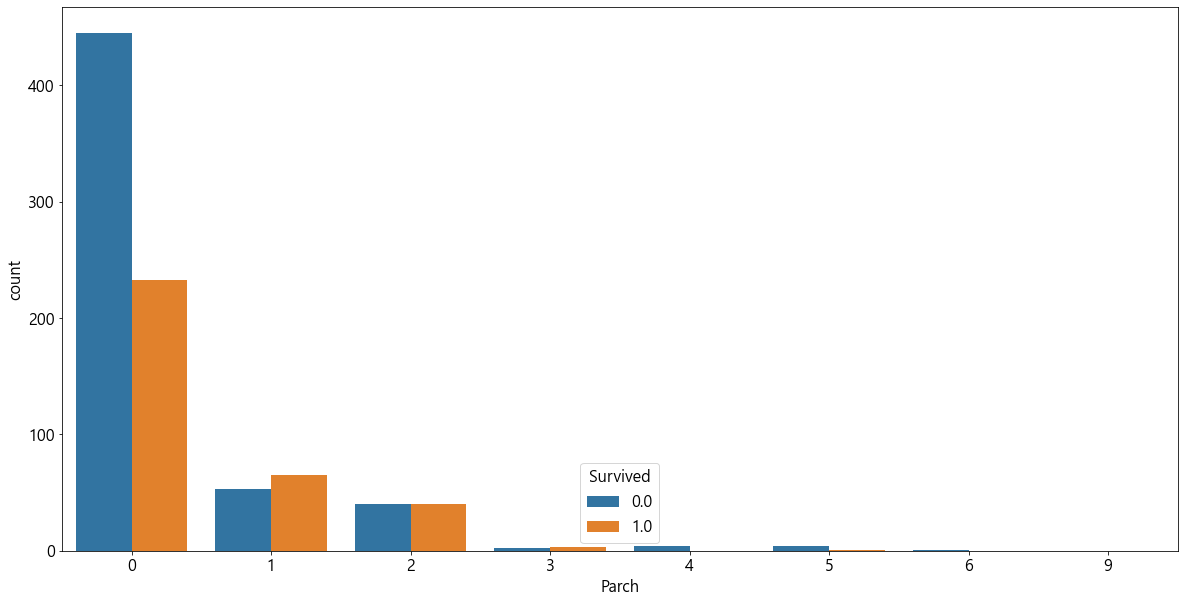

In [29]:
sns.countplot(data=data, x="Parch", hue="Survived")
plt.show()

동승한 부모, 자식 수에 따라 생존률이 달라진다.

### Ticket
- 티켓 번호

In [30]:
data["Ticket"].isna().sum()

0

In [31]:
data["Ticket"].value_counts()

CA. 2343        11
1601             8
CA 2144          8
S.O.C. 14879     7
347077           7
                ..
C.A. 29566       1
343275           1
315151           1
220367           1
349234           1
Name: Ticket, Length: 929, dtype: int64

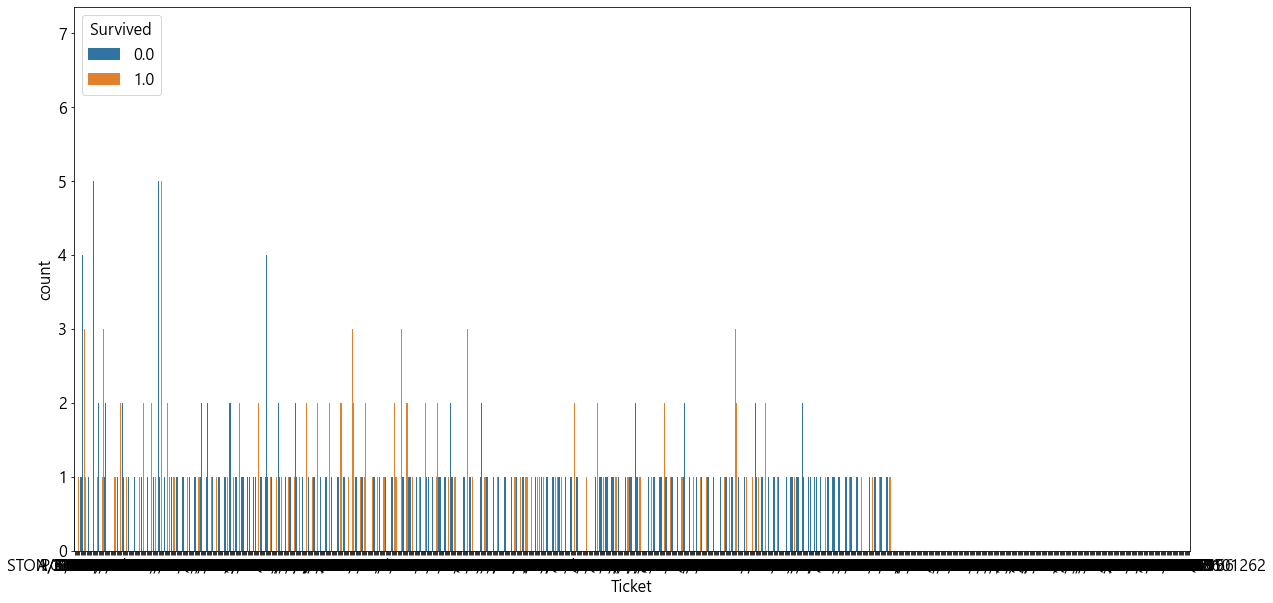

In [32]:
sns.countplot(data=data, x="Ticket", hue="Survived")
plt.show()

티켓 번호가 같은 것 중 일부는 사망 생존률이 달라진다.